### Step 1:Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2:Retreive the data

In [3]:
titanic = pd.read_csv('./titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step3:Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

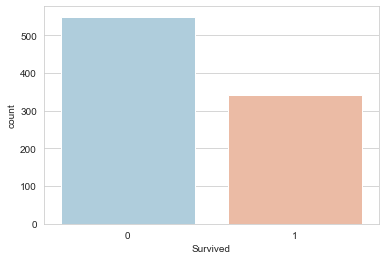

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, palette='RdBu_r')
#0 did not survive - 1 survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

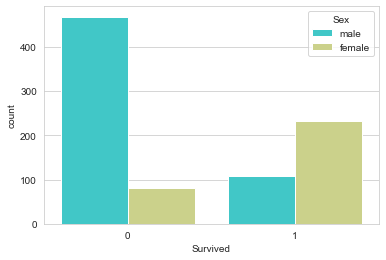

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='rainbow')

c:\Users\nazm1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

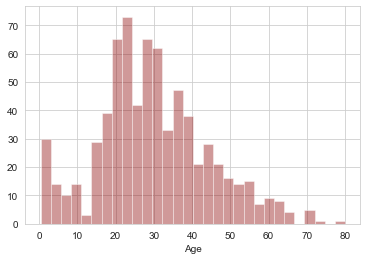

In [13]:
sns.distplot(titanic['Age'],kde=False,color='darkred',bins=30)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

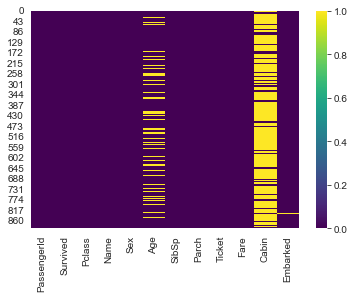

In [15]:
sns.heatmap(titanic.isnull(),cmap='viridis')

### Data Cleaning

In [ ]:
### Take the average age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

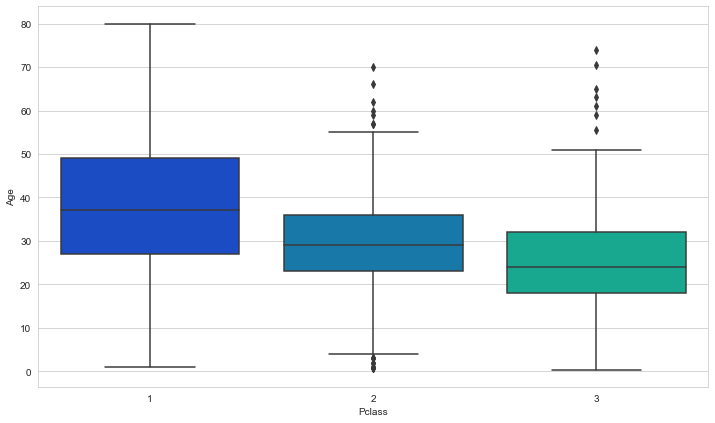

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')
### On peut constater que l'âge moyen de la première classe est de 37 ans, la deuxième classe 29 et la troisième 24

In [18]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
titanic['Age'] = titanic[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

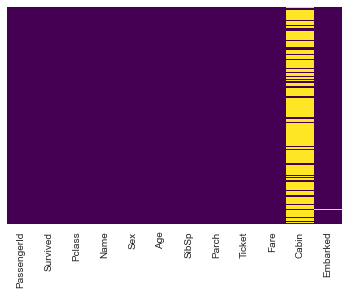

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
titanic.drop('Cabin',axis=1,inplace=True)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
titanic.dropna(inplace=True)

<AxesSubplot:>

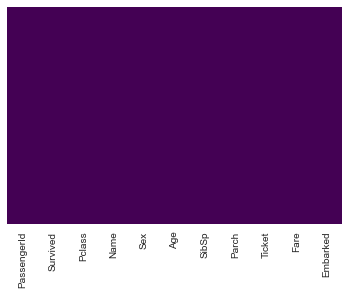

In [25]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Converting Categorical Features

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]


In [30]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [33]:
Embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
titanic = pd.concat([titanic,sex,Embark],axis=1)

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Preparing the data into train and test
#### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),
                                                    titanic['Survived'], test_size=0.30,
                                                    random_state=101)

In [39]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808       3  18.0      0      0   7.7750     0  0  1
651          652       2  18.0      0      1  23.0000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
690          691       1  31.0      1      0  57.0000     1  0  1
196          197       3  24.0      0      0   7.7500     1  1  0
..           ...     ...   ...    ...    ...      ...   ... .. ..
576          577       2  34.0      0      0  13.0000     0  0  1
840          841       3  20.0      0      0   7.9250     1  0  1
338          339       3  45.0      0      0   8.0500     1  0  1
524          525       3  24.0      0      0   7.2292     1  0  0
865          866       2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


### Build a Logistic Regression Model for Classification

In [40]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

In [42]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [43]:
preidictions = logmodel.predict(X_test)

We can check precision, recall, f1-score using classification report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preidictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [45]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix:\n', confusion_matrix(y_test,preidictions))
tn,fp,fn,tp = confusion_matrix(y_test,preidictions).ravel()
print(tn,fp,fn,tp)

Confusion Matrix:
 [[151  12]
 [ 36  68]]
151 12 36 68


c:\Users\nazm1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


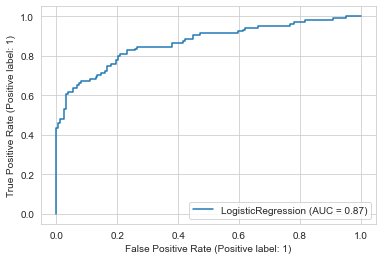

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logmodel, X_test, y_test)
plt.show()